> 41271118H 柯亮宇

<!--自行找一組與盡量與教育相關的資料，並對這組資料提問至少6個問題後，使用Pandas回答，加上註解說明與**圖形視覺化**。-->
學習分析期中作業

In [ ]:
#@title 🚀 下載資料並設定 DataFrame
#@markdown - 資料來源：[🔗](https://data.gov.tw/) 政府資料開放平台
#@markdown - 資料名稱：[🔗](https://data.gov.tw/dataset/9621) 大專校院各校科系別概況

# Import要用到的函式庫
import requests
from IPython.display import display, HTML, clear_output
import matplotlib.pyplot as plt
import pandas as pd

# 利用 Requests 將資料下載，並且利用 Pandas 將資料讀成 DataFrame

# 下載 csv 資料
csv_file_path = './112_sdata.csv'
download_file = True # @param {type:"boolean"}

if download_file:
  response = requests.get("https://stats.moe.gov.tw/files/detail/112/112_sdata.csv")

  if response.status_code == 200:
    # 如果請求成功，開始下載檔案
    with open('112_sdata.csv', 'wb') as file:
      file.write(response.content)
  else:
    print("無法下載檔案。狀態碼:", response.status_code)

# 使用pandas讀取csv檔案
df = pd.read_csv(csv_file_path)
# 去除空值
df = df.dropna()

# 新增區域、縣市代碼和縣市名稱欄位
type_list = []
code_list = []
name_list = []
for i in df['縣市名稱']:
  code_list.append(i[:2])
  name_list.append(i[3:])
  if ('北' in i) or ('新' in i) or ('基隆' in i) or ('桃園' in i) or ('宜蘭' in i):
    type_list.append('北部')
  elif ('中' in i) or ('苗栗' in i) or ('彰化' in i) or ('南投' in i) or ('雲林' in i):
    type_list.append('中部')
  elif ('高雄' in i) or ('臺南' in i) or ('嘉義' in i) or ('屏東' in i) or ('澎湖' in i):
    type_list.append('南部')
  elif ('花蓮' in i) or ('臺東' in i):
    type_list.append('東部')
  else:
    type_list.append('福建')
df['區域'] = type_list
df['縣市代碼'] = code_list
df['縣市名稱'] = name_list

# 選出所有需要的欄位
new_columns = [
  '體系別',
  '學校代碼',
  '學校名稱',
  '科系代碼',
  '科系名稱',
  '日間∕進修別',
  '等級別',
  '學生數',
  '教師數',
  '上學年度畢業生數',
  '縣市代碼',
  '縣市名稱',
  '區域'
]
df = df[new_columns]

# 設定 matplotlib https://sujingjhong.com/posts/how-to-show-matplotlib-visual-packages-in-chinese-on-colab/
import matplotlib.font_manager as font_manager
import matplotlib.pyplot as plt
# 下載並設定中文字型
if download_file:
  !wget https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKtc-hinted.zip
  !wget https://github.com/justfont/open-huninn-font/releases/download/v2.0/jf-openhuninn-2.0.ttf
  !mkdir /tmp/fonts
  !unzip -o NotoSansCJKtc-hinted.zip -d /tmp/fonts/
  !mv /tmp/fonts/NotoSansMonoCJKtc-Regular.otf /usr/share/fonts/truetype/NotoSansMonoCJKtc-Regular.otf -f
  !mv jf-openhuninn-2.0.ttf /usr/share/fonts/truetype/jf-openhuninn-2.0.ttf -f
  !rm -rf /tmp/fonts
  !rm NotoSansCJKtc-hinted.zip
clear_output()

font_dirs = ['/usr/share/fonts/truetype/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
  font_manager.fontManager.addfont(font_file)

plt.rcParams['font.family'] = "Noto Sans Mono CJK TC"
title_font = {'family': 'jf-openhuninn-2.0'}

In [ ]:
#@title 💡 關於資料
#@markdown - 原資料欄位：學年度、學校代碼、學校名稱、科系代碼、科系名稱、日間∕進修別、等級別、學生數、教師數、上學年度畢業生數、縣市名稱、體系別
#@markdown - 新欄位：體系別、學校代碼、學校名稱、科系代碼、科系名稱、日間/進修別、等級別、學生數、教師數、上學年度畢業生數、縣市代碼、縣市名稱、區域
#@markdown
#@markdown 提問
#@markdown - [x] 112 學年度各個科系中，學生數最多的科系前五名是哪些？
#@markdown - [x] 112 學年度各個科系中，教師數最多的前五名的科系是哪些？
#@markdown - [x] 112 學年度各個科系中，學士學位畢業生人數最多的前五名科系是哪些？
#@markdown - [x] 112 學年度各個區域中，平均每個學校有幾名教師？
#@markdown - [x] 112 學年度各個區域中，教師數與學生數的比例是如何分布的？
#@markdown - [x] 112 學年度各個區域中，所有級別和類型的學校中，畢業生數最多的？
#@markdown - [x] 112 學年度碩士學生數最多的科系前五名？
#@markdown - [x] 112 學年度學士畢業人數與教師數的關係？

if 'df' not in locals():
  print("請先載入資料")
else:
  # print(df.info())
  # display(HTML(df.dropna().head(10).to_html()))
  display(HTML(df.dropna().to_html()))
  # display(df.dropna().head(10).to_html(justify='start'))


### ✨ 112 學年度各個科系中，學生數最多的科系前五名是哪些？

In [ ]:
df1 = df.groupby('科系名稱')[['學生數']].sum().sort_values("學生數", ascending=False).head(5)
# groupby 將DataFrame中的數據依照科系名稱分組
# sum 把分組後的學生數加總
# sort_values 將DataFrame依據學生數由大到小排列
# head 取前五筆資料
df1

,學生數
科系名稱,
護理科,28527
資訊工程學系,22435
電機工程學系,21298
護理系,17897
企業管理系,17817


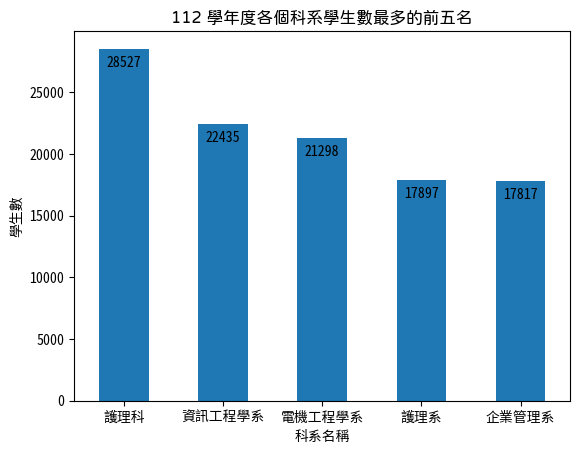

In [ ]:
ax = df1.plot(kind='bar')
# 使用 df.plot 繪製圖表
plt.title("112 學年度各個科系學生數最多的前五名",fontdict=title_font)
plt.ylabel("學生數")
plt.xticks(rotation=0) # 將標籤移正
plt.legend().remove() # 移除圖例
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, -10), textcoords='offset points')
clear_output()
plt.show()

### ✨ 112 學年度各個科系中，教師數最多的前五名的科系是哪些？

In [ ]:
df2 = df.groupby('科系名稱')[['教師數']].sum().sort_values("教師數", ascending=False).head(5)
# groupby 將DataFrame中的數據依照科系名稱分組
# sum 把分組後的教師數加總
# sort_values 將DataFrame依據教師數由大到小排列
# head 取前五筆資料
df2

,教師數
科系名稱,
醫學系,1437
護理系,990
護理科,792
電機工程學系,711
資訊工程學系,694


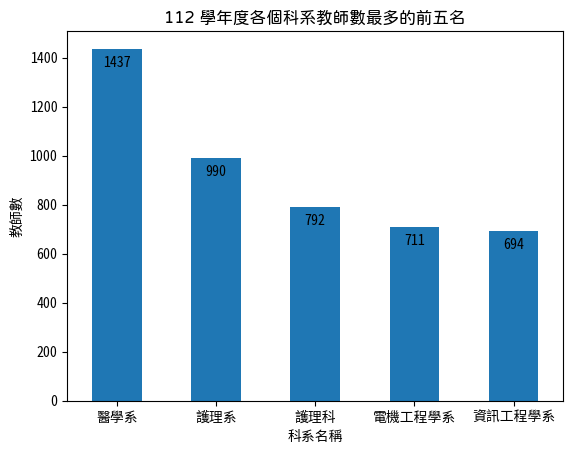

In [ ]:
ax = df2.plot(kind='bar')
plt.title("112 學年度各個科系教師數最多的前五名",fontdict=title_font)
plt.ylabel("教師數")
plt.xticks(rotation=0) # 將標籤移正
plt.legend().remove() # 移除圖例
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, -10), textcoords='offset points')
clear_output()
plt.show()

## ✨ 112 學年度各個科系中，學士學位畢業生人數最多的前五名科系是哪些？

In [ ]:
df3 = df[df['等級別'] == 'B 學士']
# 取出等級別等於 'B 學士' 的資料
df3 = df3.groupby('科系名稱')[['上學年度畢業生數']].sum().sort_values("上學年度畢業生數", ascending=False).head(5)
# groupby 將DataFrame中的數據依照科系名稱分組
# sum 把分組後的上學年度畢業生數加總
# sort_values 將DataFrame依據上學年度畢業生數由大到小排列
# head 取前五筆資料
df3

,上學年度畢業生數
科系名稱,
資訊工程學系,3535
企業管理學系,3213
電機工程學系,3181
資訊管理學系,2499
法律學系,2379


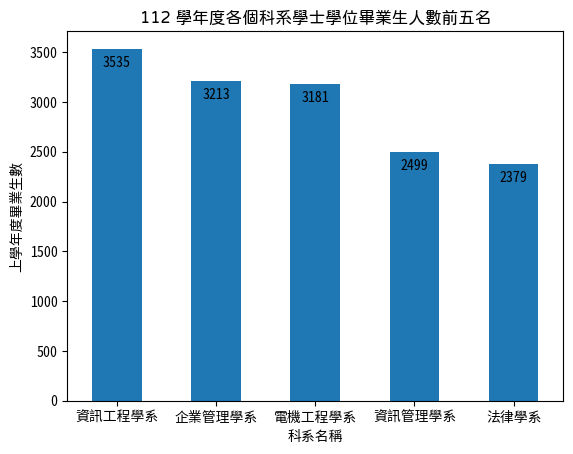

In [ ]:
ax = df3.plot(kind='bar')
plt.title("112 學年度各個科系學士學位畢業生人數前五名",fontdict=title_font)
plt.ylabel("上學年度畢業生數")
plt.xticks(rotation=0) # 將標籤移正
plt.legend().remove() # 移除圖例
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, -10), textcoords='offset points')
clear_output()
plt.show()

## ✨ 112 學年度各個區域中，平均每個學校有幾名教師？

In [ ]:
# 將同一所學校的老師人數相加
df_sum = df.groupby(['學校名稱', '區域'])['教師數'].sum().reset_index()
# groupby 將DataFrame中的數據依照學校名稱、區域分組
# sum 把分組後的教師數加總
# reset_index 將加總數字重置DataFrame索引(index)

# 根據地區計算平均值
df4 = df_sum.groupby('區域')[['教師數']].mean().sort_values("教師數", ascending=False)
# groupby 將DataFrame中的數據依照區域分組
# mean 計算分組後的教師數平均
# sort_values 將DataFrame依據教師數由大到小排列
df4

,教師數
區域,
北部,287.869565
中部,282.655172
南部,269.875000
東部,182.000000
福建,138.000000


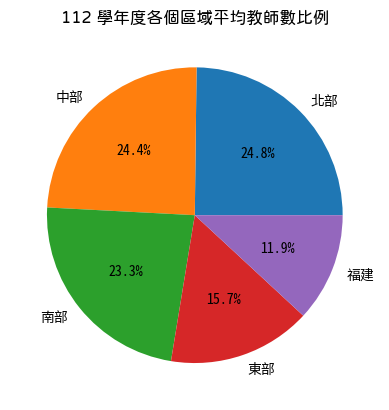

In [ ]:
ax = df4.plot(kind='pie', y='教師數', autopct='%1.1f%%')
plt.title("112 學年度各個區域平均教師數比例",fontdict=title_font)
plt.xticks(rotation=0) # 將標籤移正
plt.ylabel("")
plt.legend().remove() # 移除圖例
clear_output()
plt.show()

## ✨ 112 學年度各個區域中，教師數與學生數的比例是如何分布的？

In [ ]:
# 將同一所學校的老師人數和學生人數相加
df_sum1 = df.groupby(['區域'])['教師數'].sum().reset_index().set_index("區域", drop=True)
df_sum2 = df.groupby(['區域'])['學生數'].sum().reset_index().set_index("區域", drop=True)
# groupby 將DataFrame中的數據依照區域分組
# sum 把分組後的教師數、學生數加總
# reset_index 將加總數字重置DataFrame索引(index)
# set_index 將區域設定為索引(index)並刪除區域欄位

# 根據地區計算師生比
df5 = df_sum1.merge(df_sum2, on='區域')
# merge 將 df_sum1 和 df_sum2 區域相同的資料合併

# student–teacher ratio
df5['師生比'] = df5['學生數'] / df5['教師數']
# 計算師生比：將師生比欄位設定為學生數除教師數

df5 = df5.sort_values("師生比")[["師生比"]].round(decimals=2)
# sort_values 將DataFrame依據師生比由小到大排列
# round 取到小數後兩位
df5

,師生比
區域,
東部,20.54
南部,26.60
北部,27.03
福建,29.35
中部,29.79


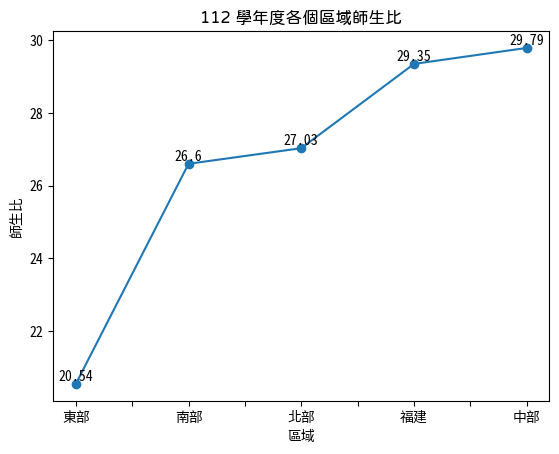

In [ ]:
ax = df5.plot(kind='line', marker='o')
plt.title("112 學年度各個區域師生比",fontdict=title_font)
plt.ylabel("師生比")
plt.xticks(rotation=0) # 將標籤移正
plt.legend().remove() # 移除圖例
for i, value in enumerate(df5['師生比']):
    plt.text(i, value, str(value), ha='center', va='bottom')
clear_output()
plt.show()

## ✨ 112 學年度各個區域中，所有級別和類型的學校中，畢業生數最多的？

In [ ]:
# 將同一所學校的畢業生人數相加
df_sum = df.groupby(['學校名稱', '區域'])['上學年度畢業生數'].sum().reset_index()
# groupby 將DataFrame中的數據依照學校名稱、區域分組
# sum 把分組後的上學年度畢業生數加總
# reset_index 將加總數字重置DataFrame索引(index)

max_index = df_sum.groupby(['區域'])[['上學年度畢業生數']].idxmax()
# groupby 將DataFrame中的數據依照區域分組
# idxmax 找到上學年度畢業生數中最大值的索引(index)

df6 = df_sum.loc[max_index['上學年度畢業生數']]
df6 = df6[['區域','學校名稱','上學年度畢業生數']].set_index('區域').sort_values("上學年度畢業生數", ascending=False)
# set_index 將區域設定為索引(index)
# sort_values 將DataFrame依據上學年度畢業生數由大到小排列
df6

,學校名稱,上學年度畢業生數
區域,,
北部,國立臺灣大學,7879
南部,國立高雄科技大學,6766
中部,逢甲大學,5135
東部,國立東華大學,2188
福建,國立金門大學,922


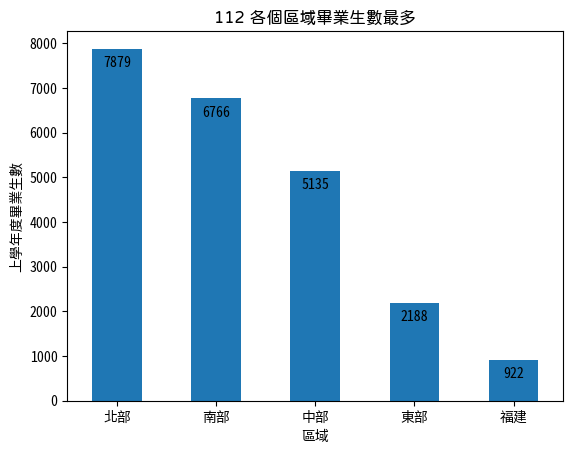

In [ ]:
ax = df6.plot(kind='bar')
plt.title("112 各個區域畢業生數最多",fontdict=title_font)
plt.ylabel("上學年度畢業生數")
plt.xticks(rotation=0) # 將標籤移正
plt.legend().remove() # 移除圖例
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, -10), textcoords='offset points')
clear_output()
plt.show()

## ✨ 112 學年度碩士學生數最多的科系前五名？

In [ ]:
df7 = df[df['等級別'] == 'M 碩士']
# 取出等級別等於 'M 碩士' 的資料
df7 = df7.groupby('科系名稱')[['學生數']].sum().sort_values("學生數", ascending=False).head(5)
# groupby 將DataFrame中的數據依照科系名稱分組
# sum 把分組後的學生數加總
# sort_values 將DataFrame依據學生數由大到小排列
# head 取前五筆資料
df7

,學生數
科系名稱,
電機工程學系,5262
資訊工程學系,4692
法律學系,4173
企業管理學系,2972
機械工程學系,2612


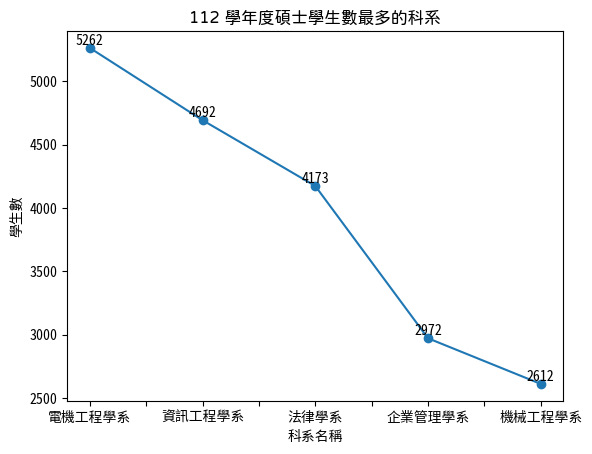

In [ ]:
ax = df7.plot(kind='line', marker='o')
plt.title("112 學年度碩士學生數最多的科系",fontdict=title_font)
plt.ylabel("學生數")
plt.xticks(rotation=0) # 將標籤移正
plt.legend().remove() # 移除圖例
for i, value in enumerate(df7['學生數']):
    plt.text(i, value, str(value), ha='center', va='bottom')
clear_output()
plt.show()

## ✨ 112 學年度學士畢業人數與教師數的關係？

In [ ]:
df8 = df[df['等級別'] == 'B 學士']
# 取出等級別等於 'B 學士' 的資料
df8 = df8.groupby('科系名稱')[['上學年度畢業生數','教師數']].sum()
# groupby 將DataFrame中的數據依照科系名稱分組
# sum 把分組後的上學年度畢業生數、教師數加總
df8

,上學年度畢業生數,教師數
科系名稱,,
不分系招生,0,3
不動產經營學系,54,12
不動產與城鄉環境學系,150,22
不動產財務金融學士學位學程,14,0
中原大學美國威大密爾瓦基分校電機與資訊工程雙學士學位學程,0,0
...,...,...
體育運動健康學院不分系學士班,0,2
高齡健康促進與照護管理原住民專班,0,0
高齡健康暨長期照護學系,39,13


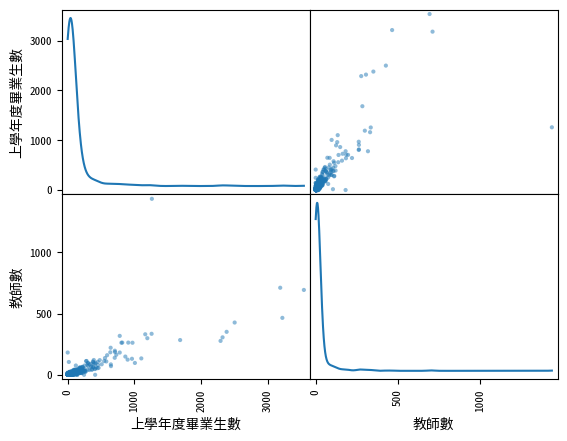

In [ ]:
# 顯示所有表徵之間的關聯性
from pandas.plotting import scatter_matrix
scatter_matrix(df8, alpha=0.5, diagonal='kde')
plt.show()